In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import gc
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from google.colab import drive

physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("GPU is available and configured.")
else:
    print("GPU not detected. Training will be slower on CPU.")

GPU is available and configured.


In [3]:
df = pd.read_csv('A_Z Handwritten Data.csv')
data_array = np.array(df.values[:, 1:], dtype=np.uint8)  # Extract images
labels = df.values[:, 0].astype(np.uint8)  # Extract labels

del df
gc.collect()

images = data_array.reshape(-1, 28, 28, 1) / 255.0

del data_array
gc.collect()

print(f"Images shape: {images.shape}, Labels shape: {labels.shape}")
assert len(labels) == images.shape[0], "Mismatch between number of images and labels"
assert np.all(labels >= 0) and np.all(labels < 26), "Labels must be between 0 and 25 for 26 classes"

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42, stratify=labels)

del images, labels
gc.collect()

x_train = np.array(x_train, copy=True)
x_test = np.array(x_test, copy=True)

Images shape: (372450, 28, 28, 1), Labels shape: (372450,)


In [4]:
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator()

batch_size = 256
train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size)
test_generator = test_datagen.flow(x_test, y_test, batch_size=batch_size)

del x_train, y_train, x_test, y_test
gc.collect()

0

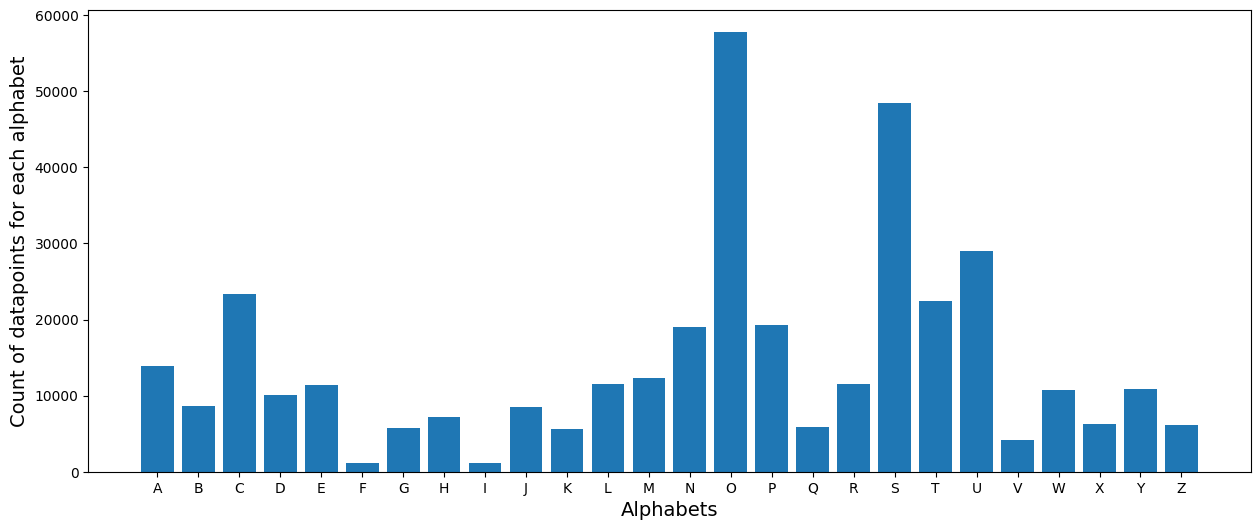

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("A_Z Handwritten Data.csv")
data_array = np.array(df, dtype=np.uint8)
alphabets = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')

labels = data_array[:, 0]
x = data_array[:, 1:].reshape(data_array.shape[0], 28, 28) / 255.  # Reshape based on data_array's shape

unique_labels, counts = np.unique(labels, return_counts=True)

alphabets_filtered = [alphabets[i] for i in unique_labels if i < len(alphabets)]  # Filter alphabets based on unique labels
counts_filtered = [counts[i] for i in range(len(unique_labels))]

fig = plt.figure(figsize=(15, 6))
plt.xlabel('Alphabets', fontsize=14)
plt.ylabel('Count of datapoints for each alphabet', fontsize=14)
plt.bar(alphabets_filtered, counts_filtered)
plt.show()

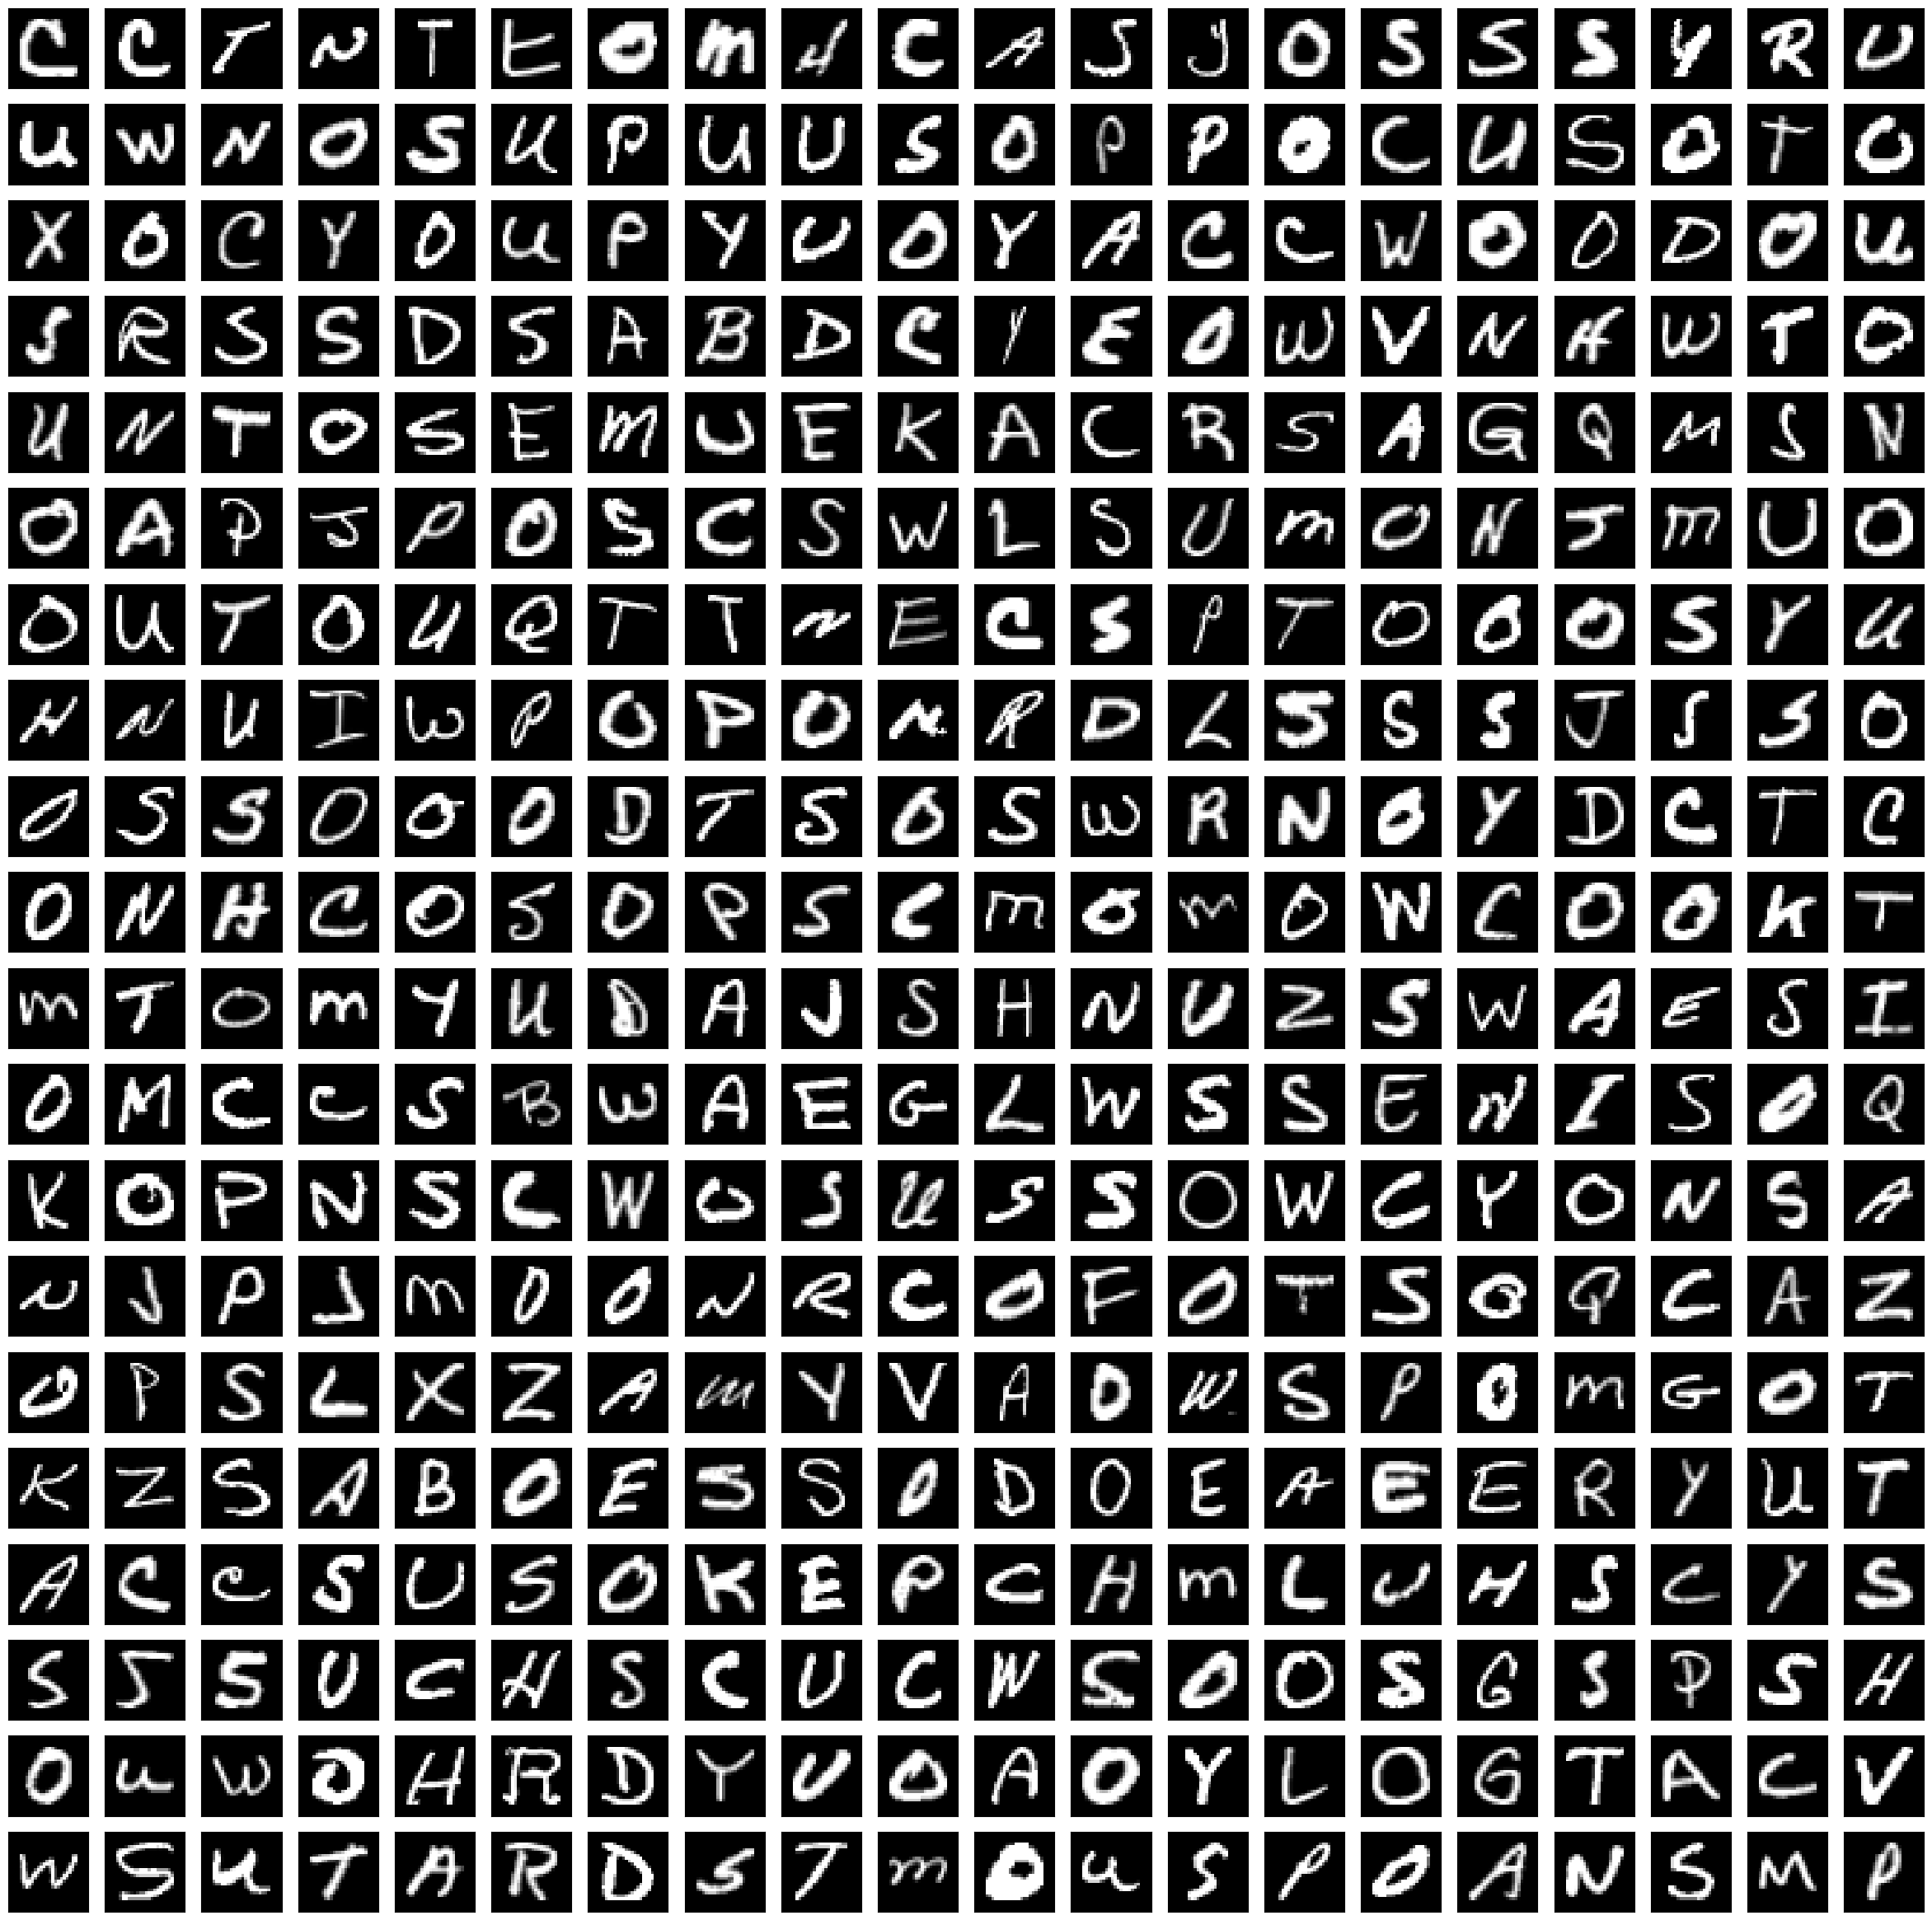

In [7]:
a = np.random.randint(low=0, high=x.shape[0], size=400)
fig = plt.figure(figsize=(30, 30))
c = 1
for i in a:
    fig.add_subplot(20, 20, c)
    plt.xticks([]);
    plt.yticks([]);
    plt.imshow(x[i], cmap='gray')
    c += 1
del a

In [9]:
nn_model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(26, activation='softmax')
])

nn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

nn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 7, 16)       │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 144)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        37,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 26)             │           858 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,378 (274.91 KB)

 Trainable params: 70,154 (274.04 KB)

 Non-trainable params: 224 (896.00 B)

In [10]:
# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,  # Stop if no improvement for 2 epochs
    restore_best_weights=True,
    verbose=1
)

# Train the model with timing
import time
start_time = time.time()

history = nn_model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=20,  # Set a higher limit, early stopping will control it
    callbacks=[early_stopping],
    verbose=1  # Show progress bar for better feedback
)

total_time = time.time() - start_time
num_epochs = len(history.history['loss'])
avg_epoch_time = total_time / num_epochs
print(f"Total training time: {total_time:.2f} seconds")
print(f"Average time per epoch: {avg_epoch_time:.2f} seconds")
print(f"Number of epochs trained: {num_epochs}")


gc.collect()

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 113s 79ms/step - accuracy: 0.3666 - loss: 2.3140 - val_accuracy: 0.9262 - val_loss: 0.2981
Epoch 2/20
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 98s 74ms/step - accuracy: 0.7980 - loss: 0.6944 - val_accuracy: 0.9616 - val_loss: 0.1426
Epoch 3/20
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 98s 75ms/step - accuracy: 0.8769 - loss: 0.4252 - val_accuracy: 0.9713 - val_loss: 0.1046
Epoch 4/20
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 99s 75ms/step - accuracy: 0.9093 - loss: 0.3230 - val_accuracy: 0.9761 - val_loss: 0.0879
Epoch 5/20
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 98s 74ms/step - accuracy: 0.9258 - loss: 0.2676 - val_accuracy: 0.9788 - val_loss: 0.0786
Epoch 6/20
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 97s 74ms/step - accuracy: 0.9376 - loss: 0.2310 - val_accuracy: 0.9796 - val_loss: 0.0763
Epoch 7/20
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 99s 76ms/step - accuracy: 0.9447 - loss: 0.2064 - val_accuracy: 0.9808 - val_loss: 0.0703
Epoch 8/20
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 97s 74ms/step - accuracy: 0.9500 

2261

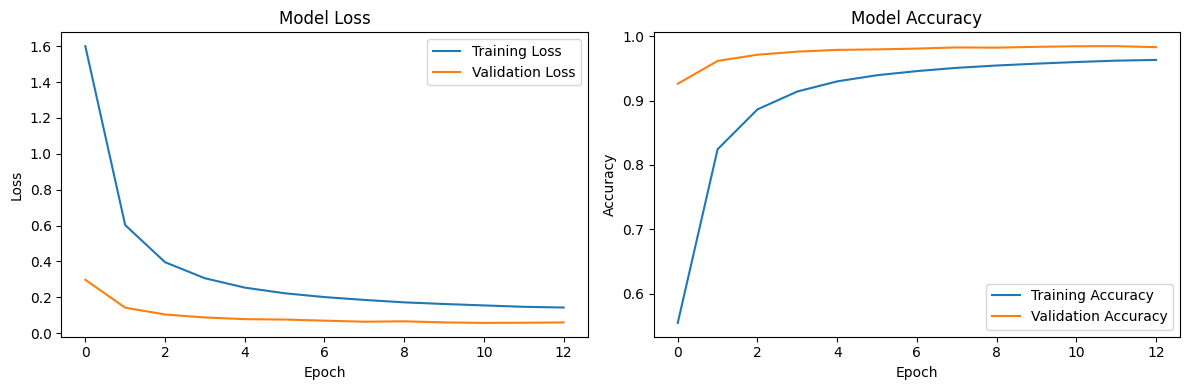

In [11]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Saving text1.png to text1.png


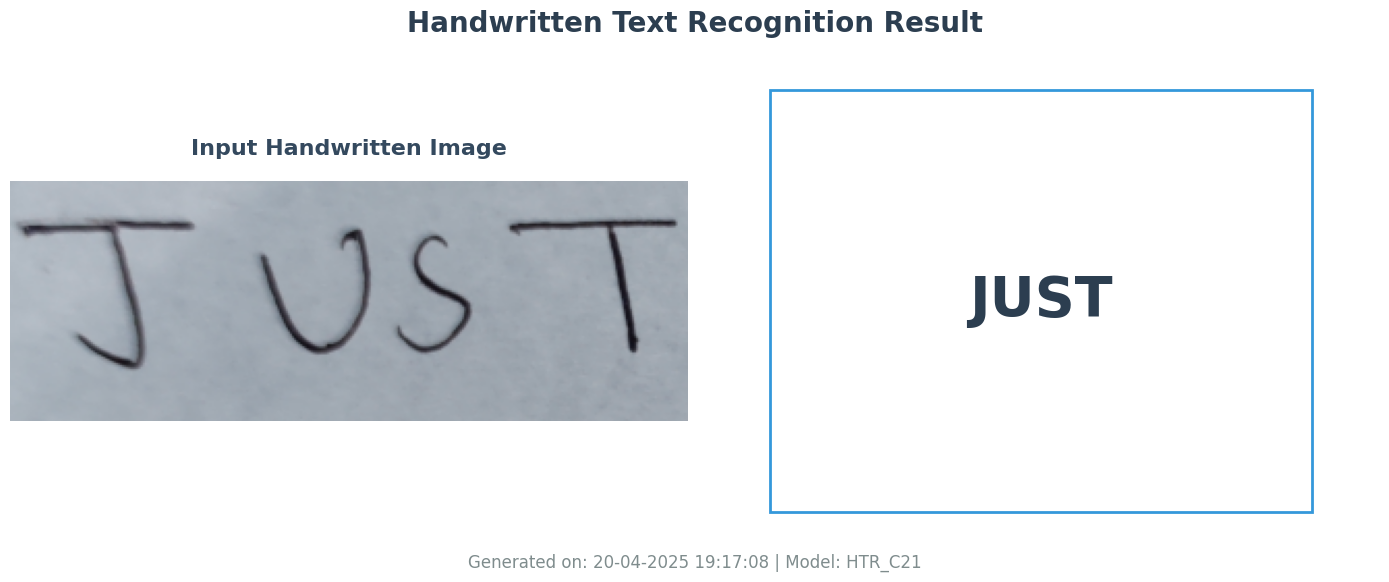

Recognized Text: JUST
Confidences: 97.4%, 98.6%, 100.0%, 99.7%


In [12]:
import cv2
import numpy as np
import tensorflow as tf
from google.colab import files
import matplotlib.pyplot as plt
from IPython.display import display
from datetime import datetime

def predict_handwritten_image():
    # Upload image file
    uploaded = files.upload()
    if not uploaded:
        return "No file uploaded"

    # Assume the first uploaded file is the image
    image_path = list(uploaded.keys())[0]
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return "Error: Could not load image"

    # Apply thresholding
    _, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])

    preprocessed_digits = []
    alphabets = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')

    # Process each contour
    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        if w > 0 and h > 0:  # Ensure valid dimensions
            digit = thresh[y:y+h, x:x+w]
            resized_digit = cv2.resize(digit, (28, 28), interpolation=cv2.INTER_AREA)
            if len(resized_digit.shape) == 2:
                resized_digit = resized_digit[..., np.newaxis]  # Add channel dimension
            preprocessed_digits.append(resized_digit)

    if not preprocessed_digits:
        return "No characters detected"

    # Convert to numpy array and normalize
    inp = np.array(preprocessed_digits, dtype=np.float32) / 255.0
    inp = inp.reshape(-1, 28, 28, 1)  # Ensure shape is (batch_size, 28, 28, 1)

    # Predict using the model
    predictions = nn_model.predict(inp, verbose=0)
    predicted_labels = np.argmax(predictions, axis=1)
    # Calculate confidence scores
    confidence_scores = [f"{(np.max(pred) * 100):.1f}%" for pred in predictions]
    recognized_text = ''.join([alphabets[label] for label in predicted_labels])

    # Create a professional figure with side-by-side alignment
    plt.style.use('ggplot')  # Clean, professional built-in style
    plt.figure(figsize=(14, 6), facecolor='#ffffff')

    # Title block
    plt.suptitle("Handwritten Text Recognition Result", fontsize=20, fontweight='bold', color='#2c3e50', y=0.95)

    # Display the input image (left side)
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.gca().set_facecolor('#ecf0f1')  # Light gray background
    plt.gca().spines['top'].set_color('#bdc3c7')
    plt.gca().spines['bottom'].set_color('#bdc3c7')
    plt.gca().spines['left'].set_color('#bdc3c7')
    plt.gca().spines['right'].set_color('#bdc3c7')
    plt.title("Input Handwritten Image", fontsize=16, fontweight='bold', pad=10, color='#34495e', y=1.05)
    plt.axis('off')

    # Display the prediction results (right side) with a rectangle box
    plt.subplot(1, 2, 2)
    plt.gca().set_facecolor('#ffffff')  # White background
    ax = plt.gca()

    box = plt.Rectangle((0.1, 0.1), 0.8, 0.8, linewidth=2, edgecolor='#3498db', facecolor='#ffffff',
                        transform=ax.transAxes, zorder=0)
    ax.add_patch(box)

    plt.text(0.5, 0.5, recognized_text, fontsize=40, fontweight='bold',
             ha='center', va='center', color='#2c3e50', zorder=1)
    ##plt.title("Predicted Text", fontsize=16, fontweight='bold', pad=10,
    # color='#34495e', y=1.05)
    plt.axis('off')

    plt.figtext(0.5, 0.02, f"Generated on: {datetime.now().strftime('%d-%m-%Y %H:%M:%S')} | Model: HTR_C21",
                ha='center', fontsize=12, color='#7f8c8d')

    plt.tight_layout()
    plt.show()

    result = f"Recognized Text: {recognized_text}"
    print(result)
    print(f"Confidences: {', '.join(confidence_scores)}")
    return result

try:
    result = predict_handwritten_image()
except Exception as e:
    print(f"Error: {e}")

Saving text3.png to text3.png


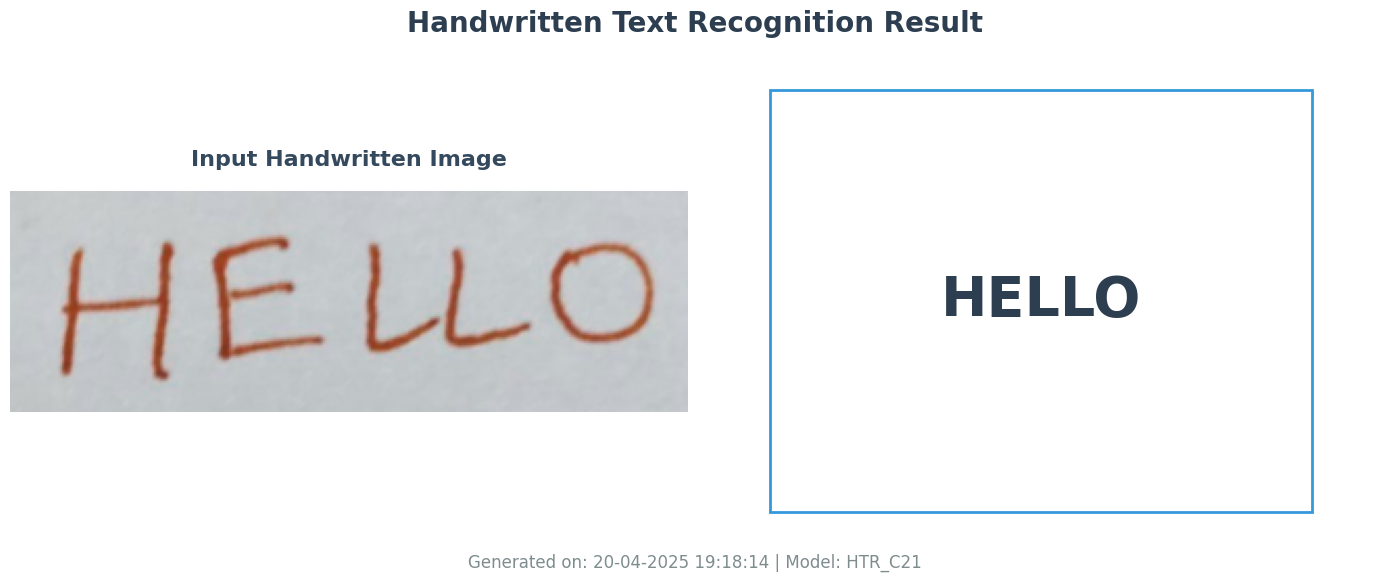

Recognized Text: HELLO
Confidences: 99.6%, 99.0%, 100.0%, 100.0%, 72.9%


In [14]:
import cv2
import numpy as np
import tensorflow as tf
from google.colab import files
import matplotlib.pyplot as plt
from IPython.display import display
from datetime import datetime

def predict_handwritten_image():
    # Upload image file
    uploaded = files.upload()
    if not uploaded:
        return "No file uploaded"

    # Assume the first uploaded file is the image
    image_path = list(uploaded.keys())[0]
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return "Error: Could not load image"

    # Apply thresholding
    _, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])

    preprocessed_digits = []
    alphabets = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')

    # Process each contour
    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        if w > 0 and h > 0:  # Ensure valid dimensions
            digit = thresh[y:y+h, x:x+w]
            resized_digit = cv2.resize(digit, (28, 28), interpolation=cv2.INTER_AREA)
            if len(resized_digit.shape) == 2:
                resized_digit = resized_digit[..., np.newaxis]  # Add channel dimension
            preprocessed_digits.append(resized_digit)

    if not preprocessed_digits:
        return "No characters detected"

    # Convert to numpy array and normalize
    inp = np.array(preprocessed_digits, dtype=np.float32) / 255.0
    inp = inp.reshape(-1, 28, 28, 1)  # Ensure shape is (batch_size, 28, 28, 1)

    # Predict using the model
    predictions = nn_model.predict(inp, verbose=0)
    predicted_labels = np.argmax(predictions, axis=1)
    # Calculate confidence scores
    confidence_scores = [f"{(np.max(pred) * 100):.1f}%" for pred in predictions]
    recognized_text = ''.join([alphabets[label] for label in predicted_labels])

    # Create a professional figure with side-by-side alignment
    plt.style.use('ggplot')  # Clean, professional built-in style
    plt.figure(figsize=(14, 6), facecolor='#ffffff')

    # Title block
    plt.suptitle("Handwritten Text Recognition Result", fontsize=20, fontweight='bold', color='#2c3e50', y=0.95)

    # Display the input image (left side)
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.gca().set_facecolor('#ecf0f1')  # Light gray background
    plt.gca().spines['top'].set_color('#bdc3c7')
    plt.gca().spines['bottom'].set_color('#bdc3c7')
    plt.gca().spines['left'].set_color('#bdc3c7')
    plt.gca().spines['right'].set_color('#bdc3c7')
    plt.title("Input Handwritten Image", fontsize=16, fontweight='bold', pad=10, color='#34495e', y=1.05)
    plt.axis('off')

    # Display the prediction results (right side) with a rectangle box
    plt.subplot(1, 2, 2)
    plt.gca().set_facecolor('#ffffff')  # White background
    ax = plt.gca()

    box = plt.Rectangle((0.1, 0.1), 0.8, 0.8, linewidth=2, edgecolor='#3498db', facecolor='#ffffff',
                        transform=ax.transAxes, zorder=0)
    ax.add_patch(box)

    plt.text(0.5, 0.5, recognized_text, fontsize=40, fontweight='bold',
             ha='center', va='center', color='#2c3e50', zorder=1)
    ##plt.title("Predicted Text", fontsize=16, fontweight='bold', pad=10,
    # color='#34495e', y=1.05)
    plt.axis('off')

    plt.figtext(0.5, 0.02, f"Generated on: {datetime.now().strftime('%d-%m-%Y %H:%M:%S')} | Model: HTR_C21",
                ha='center', fontsize=12, color='#7f8c8d')

    plt.tight_layout()
    plt.show()

    result = f"Recognized Text: {recognized_text}"
    print(result)
    print(f"Confidences: {', '.join(confidence_scores)}")
    return result

try:
    result = predict_handwritten_image()
except Exception as e:
    print(f"Error: {e}")

Saving text4.png to text4.png


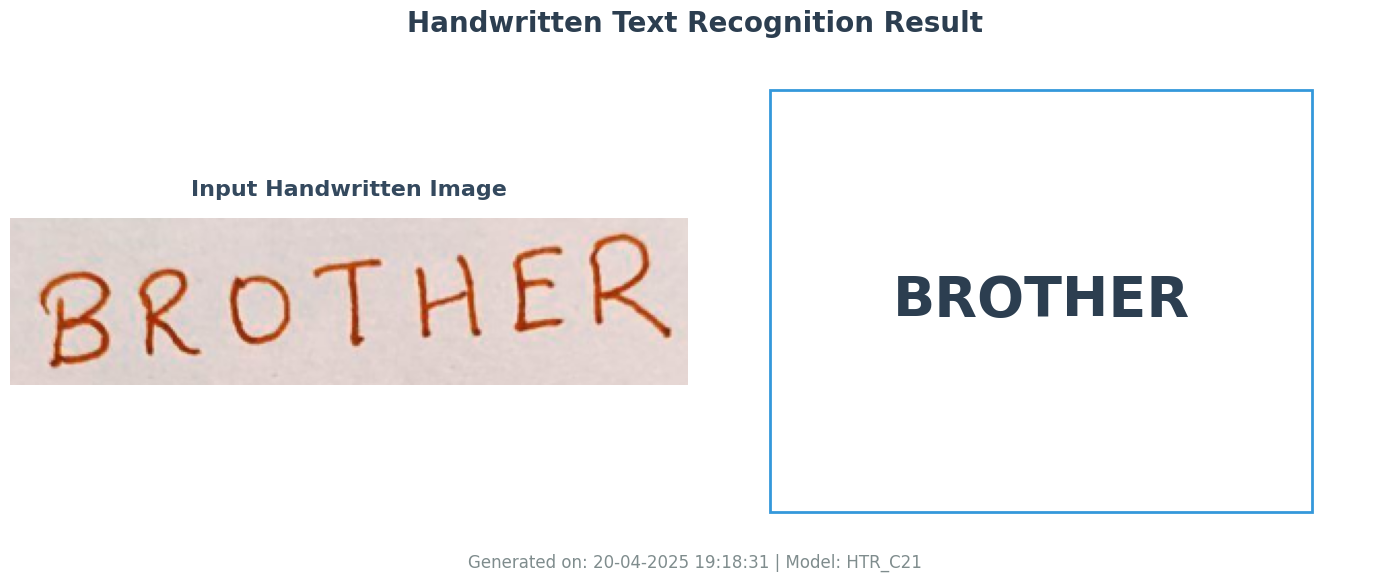

Recognized Text: BROTHER
Confidences: 100.0%, 100.0%, 55.9%, 99.5%, 82.6%, 97.1%, 100.0%


In [15]:
import cv2
import numpy as np
import tensorflow as tf
from google.colab import files
import matplotlib.pyplot as plt
from IPython.display import display
from datetime import datetime

def predict_handwritten_image():
    # Upload image file
    uploaded = files.upload()
    if not uploaded:
        return "No file uploaded"

    # Assume the first uploaded file is the image
    image_path = list(uploaded.keys())[0]
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return "Error: Could not load image"

    # Apply thresholding
    _, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])

    preprocessed_digits = []
    alphabets = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')

    # Process each contour
    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        if w > 0 and h > 0:  # Ensure valid dimensions
            digit = thresh[y:y+h, x:x+w]
            resized_digit = cv2.resize(digit, (28, 28), interpolation=cv2.INTER_AREA)
            if len(resized_digit.shape) == 2:
                resized_digit = resized_digit[..., np.newaxis]  # Add channel dimension
            preprocessed_digits.append(resized_digit)

    if not preprocessed_digits:
        return "No characters detected"

    # Convert to numpy array and normalize
    inp = np.array(preprocessed_digits, dtype=np.float32) / 255.0
    inp = inp.reshape(-1, 28, 28, 1)  # Ensure shape is (batch_size, 28, 28, 1)

    # Predict using the model
    predictions = nn_model.predict(inp, verbose=0)
    predicted_labels = np.argmax(predictions, axis=1)
    # Calculate confidence scores
    confidence_scores = [f"{(np.max(pred) * 100):.1f}%" for pred in predictions]
    recognized_text = ''.join([alphabets[label] for label in predicted_labels])

    # Create a professional figure with side-by-side alignment
    plt.style.use('ggplot')  # Clean, professional built-in style
    plt.figure(figsize=(14, 6), facecolor='#ffffff')

    # Title block
    plt.suptitle("Handwritten Text Recognition Result", fontsize=20, fontweight='bold', color='#2c3e50', y=0.95)

    # Display the input image (left side)
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.gca().set_facecolor('#ecf0f1')  # Light gray background
    plt.gca().spines['top'].set_color('#bdc3c7')
    plt.gca().spines['bottom'].set_color('#bdc3c7')
    plt.gca().spines['left'].set_color('#bdc3c7')
    plt.gca().spines['right'].set_color('#bdc3c7')
    plt.title("Input Handwritten Image", fontsize=16, fontweight='bold', pad=10, color='#34495e', y=1.05)
    plt.axis('off')

    # Display the prediction results (right side) with a rectangle box
    plt.subplot(1, 2, 2)
    plt.gca().set_facecolor('#ffffff')  # White background
    ax = plt.gca()

    box = plt.Rectangle((0.1, 0.1), 0.8, 0.8, linewidth=2, edgecolor='#3498db', facecolor='#ffffff',
                        transform=ax.transAxes, zorder=0)
    ax.add_patch(box)

    plt.text(0.5, 0.5, recognized_text, fontsize=40, fontweight='bold',
             ha='center', va='center', color='#2c3e50', zorder=1)
    ##plt.title("Predicted Text", fontsize=16, fontweight='bold', pad=10,
    # color='#34495e', y=1.05)
    plt.axis('off')

    plt.figtext(0.5, 0.02, f"Generated on: {datetime.now().strftime('%d-%m-%Y %H:%M:%S')} | Model: HTR_C21",
                ha='center', fontsize=12, color='#7f8c8d')

    plt.tight_layout()
    plt.show()

    result = f"Recognized Text: {recognized_text}"
    print(result)
    print(f"Confidences: {', '.join(confidence_scores)}")
    return result

try:
    result = predict_handwritten_image()
except Exception as e:
    print(f"Error: {e}")

Saving text5.png to text5.png


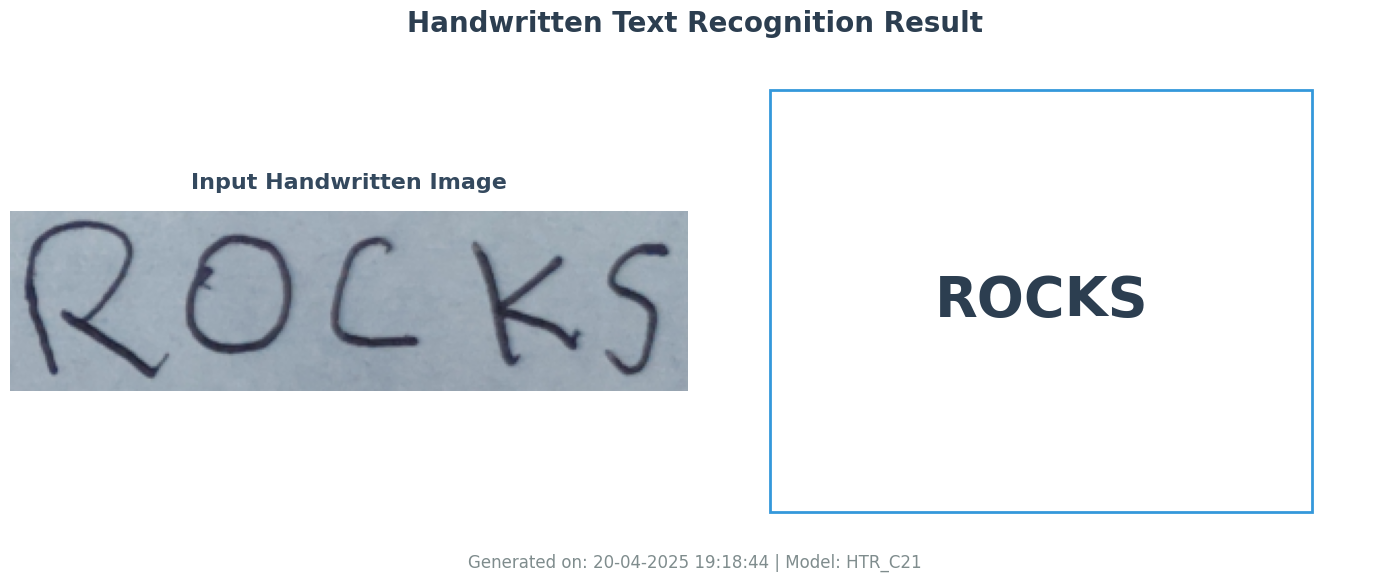

Recognized Text: ROCKS
Confidences: 44.6%, 98.8%, 99.5%, 100.0%, 99.9%


In [16]:
import cv2
import numpy as np
import tensorflow as tf
from google.colab import files
import matplotlib.pyplot as plt
from IPython.display import display
from datetime import datetime

def predict_handwritten_image():
    # Upload image file
    uploaded = files.upload()
    if not uploaded:
        return "No file uploaded"

    # Assume the first uploaded file is the image
    image_path = list(uploaded.keys())[0]
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return "Error: Could not load image"

    # Apply thresholding
    _, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])

    preprocessed_digits = []
    alphabets = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')

    # Process each contour
    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        if w > 0 and h > 0:  # Ensure valid dimensions
            digit = thresh[y:y+h, x:x+w]
            resized_digit = cv2.resize(digit, (28, 28), interpolation=cv2.INTER_AREA)
            if len(resized_digit.shape) == 2:
                resized_digit = resized_digit[..., np.newaxis]  # Add channel dimension
            preprocessed_digits.append(resized_digit)

    if not preprocessed_digits:
        return "No characters detected"

    # Convert to numpy array and normalize
    inp = np.array(preprocessed_digits, dtype=np.float32) / 255.0
    inp = inp.reshape(-1, 28, 28, 1)  # Ensure shape is (batch_size, 28, 28, 1)

    # Predict using the model
    predictions = nn_model.predict(inp, verbose=0)
    predicted_labels = np.argmax(predictions, axis=1)
    # Calculate confidence scores
    confidence_scores = [f"{(np.max(pred) * 100):.1f}%" for pred in predictions]
    recognized_text = ''.join([alphabets[label] for label in predicted_labels])

    # Create a professional figure with side-by-side alignment
    plt.style.use('ggplot')  # Clean, professional built-in style
    plt.figure(figsize=(14, 6), facecolor='#ffffff')

    # Title block
    plt.suptitle("Handwritten Text Recognition Result", fontsize=20, fontweight='bold', color='#2c3e50', y=0.95)

    # Display the input image (left side)
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.gca().set_facecolor('#ecf0f1')  # Light gray background
    plt.gca().spines['top'].set_color('#bdc3c7')
    plt.gca().spines['bottom'].set_color('#bdc3c7')
    plt.gca().spines['left'].set_color('#bdc3c7')
    plt.gca().spines['right'].set_color('#bdc3c7')
    plt.title("Input Handwritten Image", fontsize=16, fontweight='bold', pad=10, color='#34495e', y=1.05)
    plt.axis('off')

    # Display the prediction results (right side) with a rectangle box
    plt.subplot(1, 2, 2)
    plt.gca().set_facecolor('#ffffff')  # White background
    ax = plt.gca()

    box = plt.Rectangle((0.1, 0.1), 0.8, 0.8, linewidth=2, edgecolor='#3498db', facecolor='#ffffff',
                        transform=ax.transAxes, zorder=0)
    ax.add_patch(box)

    plt.text(0.5, 0.5, recognized_text, fontsize=40, fontweight='bold',
             ha='center', va='center', color='#2c3e50', zorder=1)
    ##plt.title("Predicted Text", fontsize=16, fontweight='bold', pad=10,
    # color='#34495e', y=1.05)
    plt.axis('off')

    plt.figtext(0.5, 0.02, f"Generated on: {datetime.now().strftime('%d-%m-%Y %H:%M:%S')} | Model: HTR_C21",
                ha='center', fontsize=12, color='#7f8c8d')

    plt.tight_layout()
    plt.show()

    result = f"Recognized Text: {recognized_text}"
    print(result)
    print(f"Confidences: {', '.join(confidence_scores)}")
    return result

try:
    result = predict_handwritten_image()
except Exception as e:
    print(f"Error: {e}")



---



In [19]:
nn_model.save("HTR_MODEL_3_002.h5")

In [20]:
from google.colab import files
files.download("HTR_MODEL_3_002.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>